### Importing Relevant Packages

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Loading and Transforming the Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
raw_csv_data = pd.read_csv("/content/drive/My Drive/100. COMPARTIDO/GITHUB/TEMPERATURA_PRECIPITACION.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')
df_comp.head()


Para visualizar al completo un fichero

In [13]:
df_comp

,litros,temp
date,,
2003-01-01,44.633,14.319936
2003-01-02,44.633,14.319936
2003-01-03,44.633,14.319936
2003-01-06,44.633,14.319936
2003-01-07,44.633,14.319936
...,...,...
2019-11-25,38.822,14.587836
2019-11-26,38.822,14.587836
2019-11-27,38.822,14.587836


Para describir un fichero

In [14]:
df_comp.describe()

,litros,temp
count,4413.000000,4413.000000
mean,42.245411,15.103133
std,37.211809,0.512808
min,0.458000,14.159384
25%,11.585000,14.610815
50%,29.632000,15.074030
75%,59.358000,15.559232
max,194.184000,15.886716




### Removing Surplus Data

In [14]:
df_comp['market_value']=df_comp.temp

In [15]:
del df_comp['litros']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

### White Noise

In [16]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

In [17]:
df['wn'] = wn

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df.describe()

,temp,market_value,wn
count,3530.000000,3530.000000,3530.000000
mean,15.095923,15.095923,15.097549
std,0.513411,0.513411,0.512664
min,14.159384,14.159384,13.397542
25%,14.605709,14.605709,14.759771
50%,15.106944,15.106944,15.086670
75%,15.541836,15.541836,15.446978
max,15.886716,15.886716,16.757097


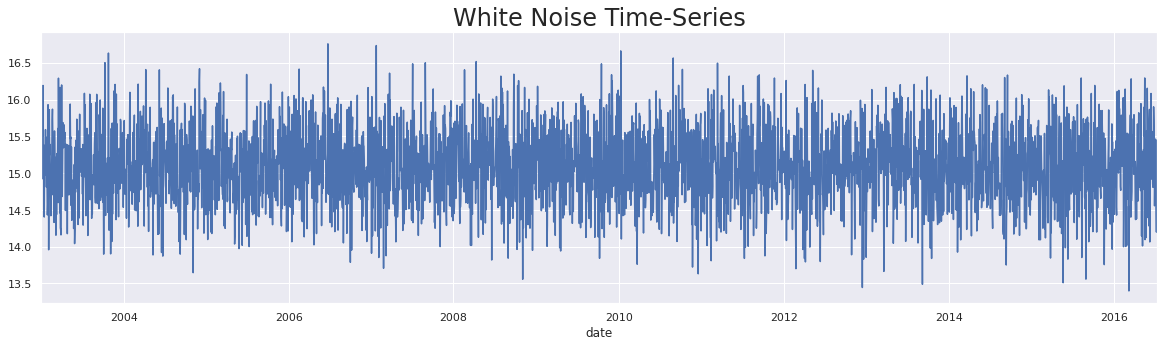

In [19]:
df.wn.plot(figsize = (20,5))
plt.title("White Noise Time-Series", size= 24)
plt.show()

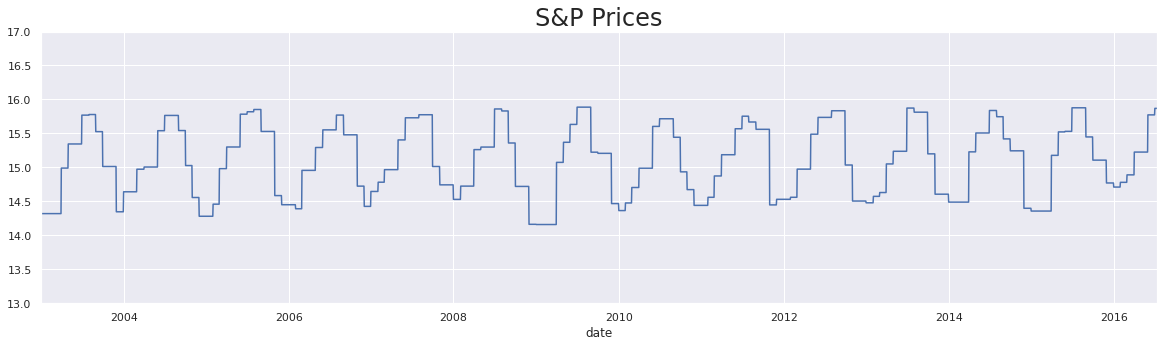

In [22]:
df.market_value.plot(figsize=(20,5))
plt.title("S&P Prices", size = 24)
plt.ylim(13,17)
plt.show()

### Random Walk

In [24]:
rw = df


In [25]:
df.head()

,temp,market_value,wn
date,,,
2003-01-01,14.319936,14.319936,15.611369
2003-01-02,14.319936,14.319936,15.464747
2003-01-03,14.319936,14.319936,14.976339
2003-01-06,14.319936,14.319936,14.920866
2003-01-07,14.319936,14.319936,15.838637


In [32]:
rw.date = pd.to_datetime(rw.date, dayfirst = True)


AttributeError: ignored

In [30]:
rw.set_index("date", inplace = True)


KeyError: ignored

In [ ]:
rw.head()

,price
date,
1994-01-07,1122.139662
1994-01-08,1135.238562
1994-01-09,1109.897831
1994-01-10,1080.347860
1994-01-11,1082.095245


In [ ]:
rw = rw.asfreq('b')

In [ ]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [ ]:
df['rw'] = rw.price

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,1136.938032,1122.139662
1994-01-10,475.27,798.119160,1080.347860
1994-01-11,474.13,908.672286,1082.095245
1994-01-12,474.17,555.414796,1083.639265
1994-01-13,472.47,1451.393321,1067.146255


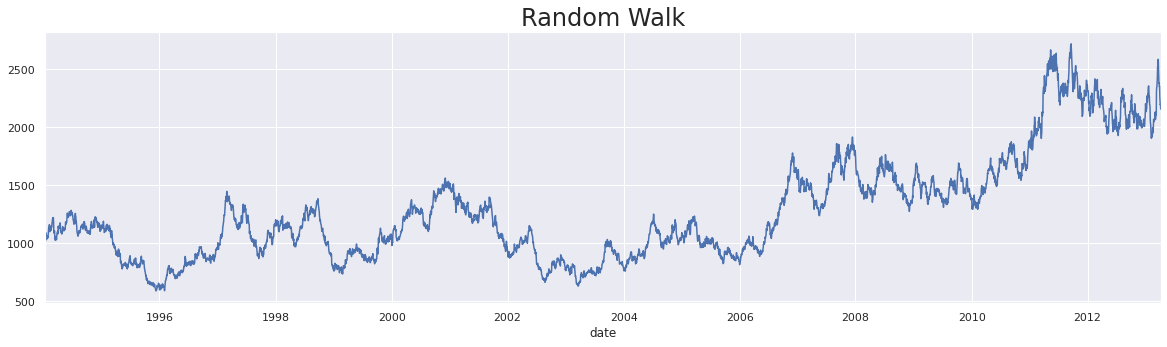

In [ ]:
df.rw.plot(figsize = (20,5))
plt.title("Random Walk", size = 24)
plt.show()

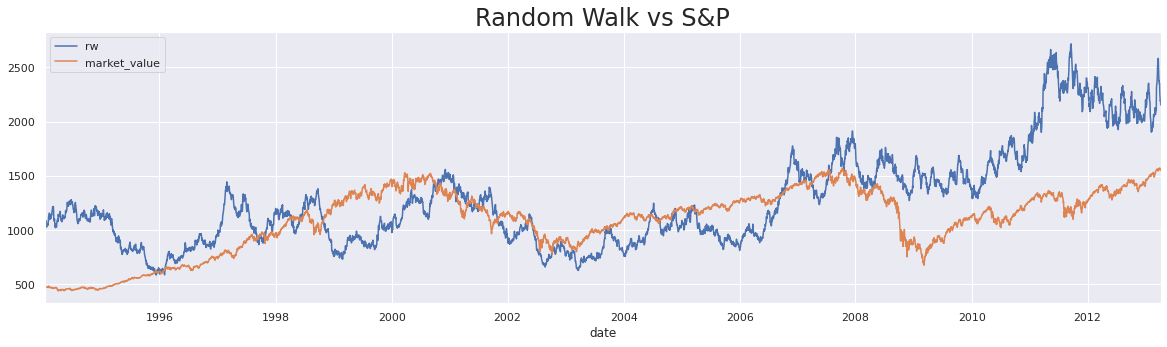

In [ ]:
df.rw.plot(figsize = (20,5))
df.market_value.plot()
plt.title("Random Walk vs S&P", size = 24)
plt.legend() 
plt.show()

### Stationarity

In [ ]:
sts.adfuller(df.market_value)

(-1.736984745235244,
 0.41216456967706194,
 18,
 5002,
 {'1%': -3.431658008603046,
  '10%': -2.567077669247375,
  '5%': -2.862117998412982},
 39904.880607487445)

In [ ]:
sts.adfuller(df.wn)

(-69.43972849152433,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '10%': -2.5670765656497516,
  '5%': -2.8621159253018247},
 70827.67556232118)

In [ ]:
sts.adfuller(df.rw)


(-1.3286073927689708,
 0.6159849181617388,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '10%': -2.567078038881065,
  '5%': -2.8621186927706463},
 46299.333497595144)

### Seasonality

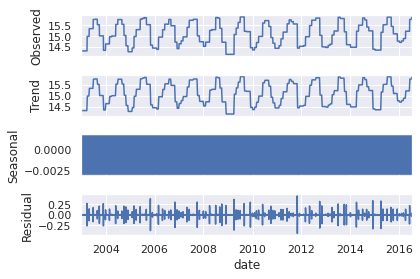

In [33]:
s_dec_additive = seasonal_decompose(df.market_value, model = "additive")
s_dec_additive.plot()
plt.show()

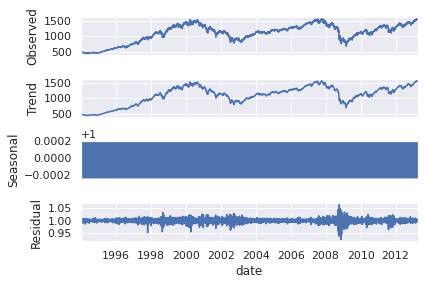

In [ ]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

### ACF

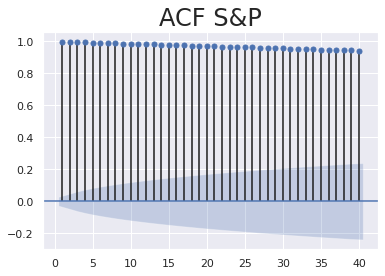

In [ ]:
sgt.plot_acf(df.market_value, lags = 40, zero = False)
plt.title("ACF S&P", size = 24)
plt.show()

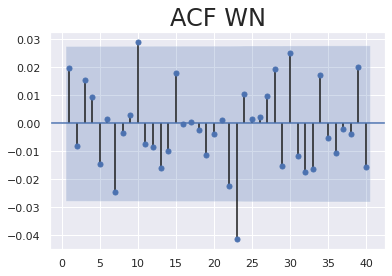

In [ ]:
sgt.plot_acf(df.wn, lags = 40, zero = False)
plt.title("ACF WN", size = 24)
plt.show()

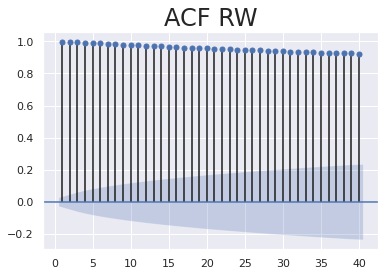

In [ ]:
sgt.plot_acf(df.rw, lags = 40, zero = False)
plt.title("ACF RW", size = 24)
plt.show()

### PACF

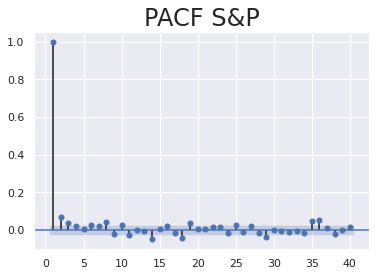

In [ ]:
sgt.plot_pacf(df.market_value, lags = 40, zero = False, method = ('ols'))
plt.title("PACF S&P", size = 24)
plt.show()

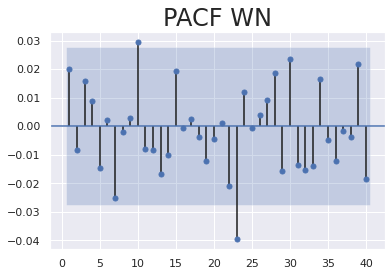

In [ ]:
sgt.plot_pacf(df.wn, lags = 40, zero = False, method = ('ols'))
plt.title("PACF WN", size = 24)
plt.show()

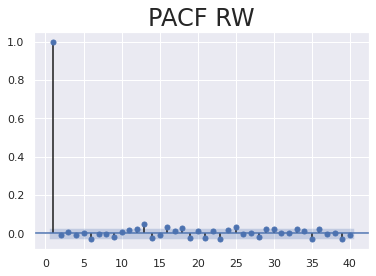

In [ ]:
sgt.plot_pacf(df.rw, lags = 40, zero = False, method = ('ols'))
plt.title("PACF RW", size = 24)
plt.show()